In [31]:
import mglearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer, make_blobs, fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer, QuantileTransformer, PowerTransformer
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

#### 주성분 분석(PCA)
- 특성들이 통계적으로 상관관계가 없도록 데이터셋을 회전시키는 기술
- 회전한 뒤에 데이터를 설명하는데 얼마나 중요하냐에 따라 종종 일부만 선택

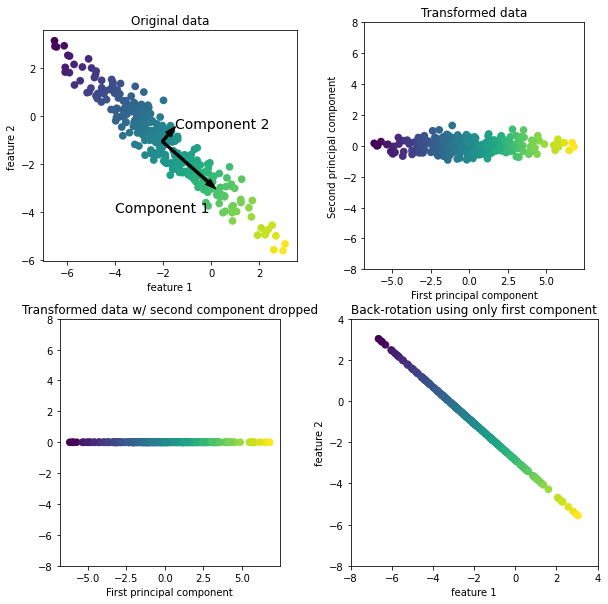

In [3]:
mglearn.plots.plot_pca_illustration()

- 첫 번째 그래프는 원본 데이터를 색으로 구분해 표시한 것
- 이 알고리즘은 Component1 이라고 쓰여 있는 분산이 가장 큰 방향을 찾는다. 이 방향이 데이터에서 가장 많은 정보를 담고 있는 방향 (다른 말로 상관관계가 가장 큰 방향)
- 그 다음, 첫 번째 방향과 직각인 방향 중 가장 많은 정보를 담은 방향을 찾는다.
- 이렇게 찾은 방향들을 데이터에 있는 주된 분산의 방향이라고 해서 주성분이라고 한다. 일반적으로 특성 개수만큼 주성분이 있다.
  #
- 두 번째 그래프는 주성분 1과 2를 각각 x축과 y축에 나란하도록 회전한 것.
- 회전하기 전에 평균을 빼서 중심을 원점에 맞춘다.
- PCA에 의해 회전된 두 축은 연관되어 있지 않으므로 변환된 데이터의 상관관계 행렬이 대각선 방향을 제외하고 0이 된다.
  #
- 세 번째 그래프처럼 주성분의 일부만 남기는 차원 축소 용도로 사용가능하다.
- 위의 그래프처럼 첫 번째 주성분만 유지할 경우 2차원 데이터가 1차원으로 차원이 감소한다.
- 단순히 원본 특성 중 하나만 남기는 것이 아니라 가장 유용한 방향을 찾아 그 방향의 성분을 유지하는 것
  #
- 마지막 그래프는 데이터에 평균을 더하고 반대로 회전시킨 것
- 원래 특성 공간에 놓여 있지만 첫 번째 주성분의 정보만 담고 있다.
- 데이터에서 노이즈를 제거하거나 주성분에서 유지되는 정보를 시각화하는데 종종 사용한다.

C:\Users\dbswo\AppData\Local\Temp\ipykernel_19732\3771193154.py:19: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  fig.tight_layout()
C:\Users\dbswo\AppData\Local\Temp\ipykernel_19732\3771193154.py:19: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.tight_layout()
C:\Users\dbswo\AppData\Local\Temp\ipykernel_19732\3771193154.py:19: UserWarning: Glyph 53356 (\N{HANGUL SYLLABLE KEU}) missing from current font.
  fig.tight_layout()
C:\Users\dbswo\AppData\Local\Temp\ipykernel_19732\3771193154.py:19: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.tight_layout()
C:\Users\dbswo\AppData\Local\Temp\ipykernel_19732\3771193154.py:19: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  fig.tight_layout()
C:\Users\dbswo\AppData\Local\Temp\ipykernel_19732\3771193154.py:19: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.tight_layout

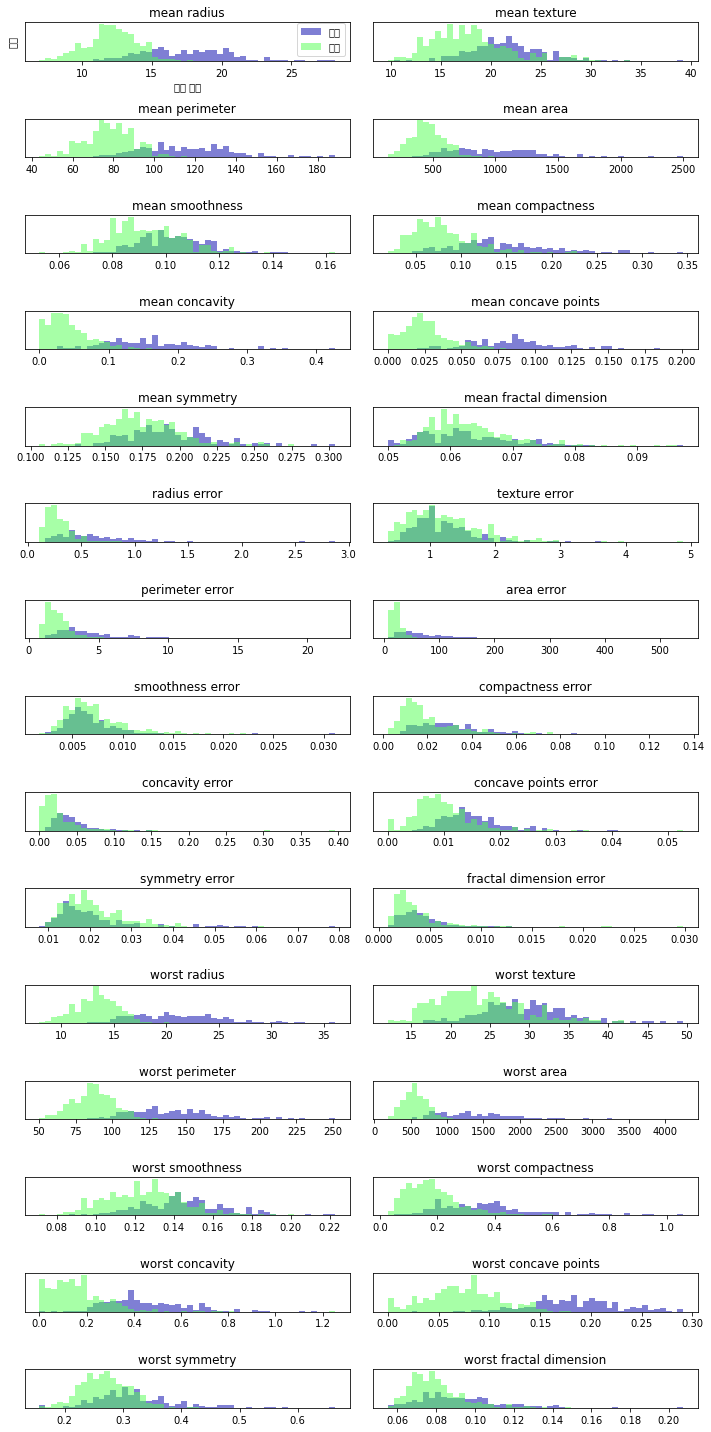

In [4]:
cancer = load_breast_cancer()

fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())

ax[0].set_xlabel('특성 크기')
ax[0].set_ylabel('빈도')
ax[0].legend(['악성', '양성'], loc='best')
fig.tight_layout()

In [2]:
cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [4]:
# 데이터의 처음 두 개 주성분만 유지
pca = PCA(n_components=2)

pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)
print('원본 데이터 형태 : ',str(X_scaled.shape))
print('축소된 데이터 형태 : ',str(X_pca.shape))

원본 데이터 형태 :  (569, 30)
축소된 데이터 형태 :  (569, 2)


Text(0, 0.5, '두 번째 주성분')

c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52395 (\N{HANGUL SYLLABLE CEOS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48264 (\N{HANGUL SYLLABLE BEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51704 (\N{HANGUL SYLLABLE JJAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\m

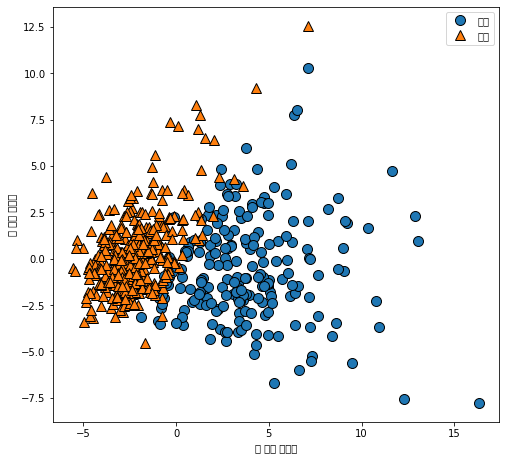

In [5]:
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(['악성', '양성'], loc='best')
plt.gca().set_aspect('equal')
plt.xlabel('첫 번째 주성분')
plt.ylabel('두 번째 주성분')

- pca의 단점은 그래프의 두 축을 해석하기가 쉽지 않다는 점
- 원본 데이터에 있는 어떤 방향에 대응하는 여러 특성이 조합된 형태인데 매우 복잡하다.

In [6]:
print('PCA 주성분 형태 : ', pca.components_.shape)

PCA 주성분 형태 :  (2, 30)


In [19]:
print('PCA 주성분 표')
pd.DataFrame(pca.components_, columns=cancer.feature_names)

PCA 주성분 표


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
1,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339


Text(0, 0.5, '주성분')

c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52395 (\N{HANGUL SYLLABLE CEOS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48264 (\N{HANGUL SYLLABLE BEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51704 (\N{HANGUL SYLLABLE JJAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo

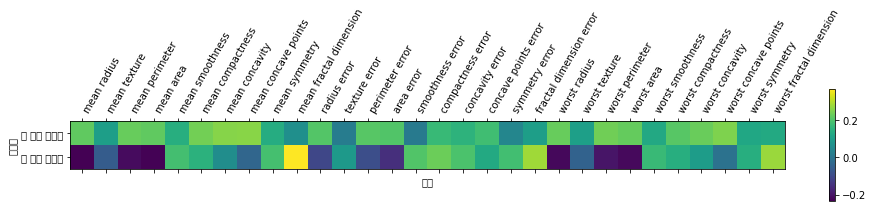

In [20]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ['첫 번째 주성분', '두 번째 주성분'])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
            cancer.feature_names, rotation=60, ha='left')
plt.xlabel('특성')
plt.ylabel('주성분')

- 첫 번째 주성분의 모든 특성은 부호가 같다. 모든 특성 사이에 공통의 상호관계가 있다는 뜻

#### 고유얼굴(eigenface) 특성 추출

- 특성 추출은 원본 데이터 표현보다 분석하기에 더 적합한 표현을 찾을 수 있을 것이란 생각에서 출발

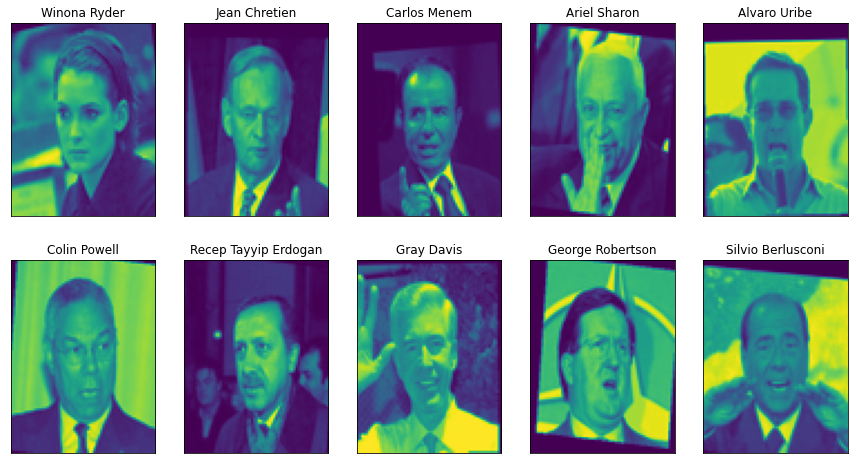

In [22]:
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                        subplot_kw={'xticks' : (), 'yticks' : ()}) # add_subplot()을 사용할 때 사용할 키워드 담는 dict, 이미지를 출력할 것이기 때문에 둘 다 빈칸으로 설정

for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [23]:
print('people.images.shape :', people.images.shape)
print('클래스 개수 : ', len(people.target_names))

people.images.shape : (3023, 87, 65)
클래스 개수 :  62


In [27]:
# 각 타깃이 나타난 횟수 계산
counts = np.bincount(people.target)

# 타깃별 이름과 횟수 출력
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print('{0:25} {1:3}'.format(name, count), end='   ')
    if (i + 1) % 3 == 0:
        print()


Alejandro Toledo           39   Alvaro Uribe               35   Amelie Mauresmo            21   
Andre Agassi               36   Angelina Jolie             20   Ariel Sharon               77   
Arnold Schwarzenegger      42   Atal Bihari Vajpayee       24   Bill Clinton               29   
Carlos Menem               21   Colin Powell              236   David Beckham              31   
Donald Rumsfeld           121   George Robertson           22   George W Bush             530   
Gerhard Schroeder         109   Gloria Macapagal Arroyo    44   Gray Davis                 26   
Guillermo Coria            30   Hamid Karzai               22   Hans Blix                  39   
Hugo Chavez                71   Igor Ivanov                20   Jack Straw                 28   
Jacques Chirac             52   Jean Chretien              55   Jennifer Aniston           21   
Jennifer Capriati          42   Jennifer Lopez             21   Jeremy Greenstock          24   
Jiang Zemin                20 

In [29]:
mask = np.zeros(people.target.shape, dtype=np.bool_)

for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]

X_people = X_people / 255.

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print('1-최근접 이웃의 테스트 세트 점수 : {:.2f}'.format(knn.score(X_test, y_test)))

1-최근접 이웃의 테스트 세트 점수 : 0.14


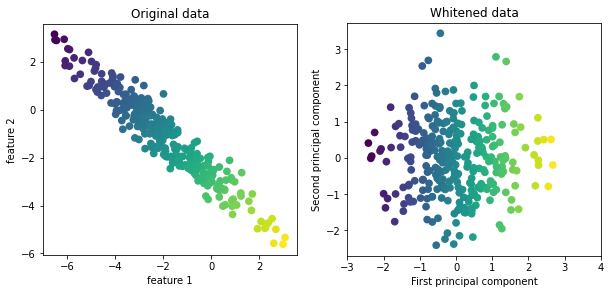

In [34]:
# whitening 은 pca 변환 후 StandardScaler를 적용하는 것과 같은 효과

mglearn.plots.plot_pca_whitening()

- 이미지 분류에서 픽셀을 있는 그대로 비교하는 방식은 얼굴 위치가 조금만 달라져도 잡아내기가 어렵다
- 따라서 주성분 변환을 통해 거리를 계산하면 정확도가 높아지지 않을까 시도

In [35]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print('X_train_pca.shape:', X_train_pca.shape)

X_train_pca.shape: (1547, 100)


In [36]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print('테스트 세트 정확도: {:.2f}'.format(knn.score(X_test_pca, y_test)))

테스트 세트 정확도: 0.15


pca.components_.shape :  (100, 5655)


c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


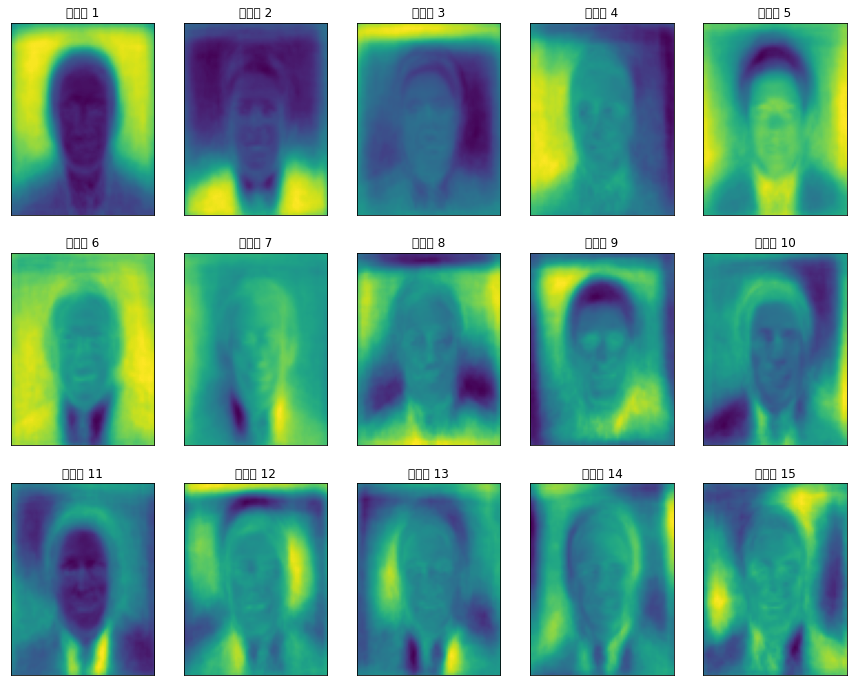

In [39]:
print('pca.components_.shape : ', pca.components_.shape)


fig, axes = plt.subplots(3, 5, figsize=(15, 12),
                        subplot_kw={'xticks' : (), 'yticks' : ()})

for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title("주성분 {}".format((i + 1)))

In [ ]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

Text(0, 0.5, '두 번째 주성분')

c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52395 (\N{HANGUL SYLLABLE CEOS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48264 (\N{HANGUL SYLLABLE BEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51704 (\N{HANGUL SYLLABLE JJAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\m

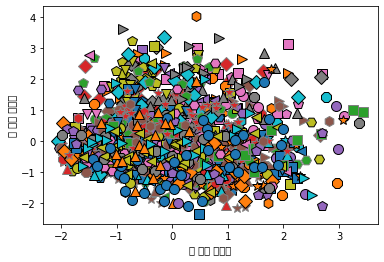

In [43]:
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train)
plt.xlabel('첫 번째 주성분')
plt.ylabel('두 번째 주성분')